In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylake

C:\Users\leroquan\AppData\Local\anaconda3\envs\mitgcm_env\lib\site-packages\pylake\pylake.py:3: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


# Heat fluxes MITgcm

In [2]:
xr_base = xr.open_dataset("D:\geneva_heat_fluxes\crop_results\lexplore_depth_time.nc")

In [3]:
xr_mitgcm = xr.open_dataset("D:\geneva_lw_corr\crop_results\heatfluxes.nc")
xr_lexplore = xr_mitgcm.sel(XC=49850, YC=18100, XG=49850, YG=18100, method='nearest')

In [4]:
temp_ini = xr_mitgcm.THETA.isel(time=0)
mask_lake = xr.where(abs(temp_ini) > 1e-10, 1, np.nan)

In [5]:
xr_ext_forc = xr.open_dataset("D:\geneva_lw_corr\crop_results\external_forcing.nc") 

#multiplied by -1 to have downward fluxes instead of upward ones
xr_ext_forc['EXFlwnet'] = -1*xr_ext_forc['EXFlwnet']
xr_ext_forc['EXFswnet'] = -1* xr_ext_forc['EXFswnet']
xr_ext_forc['EXFqnet'] = -1* xr_ext_forc['EXFqnet']

#xr_ext_forc_lexplore = xr_ext_forc.sel(XC=49850, YC=18100, XG=49850, YG=18100, method='nearest')

In [6]:
xr_ext_forc_masked = xr_ext_forc * mask_lake

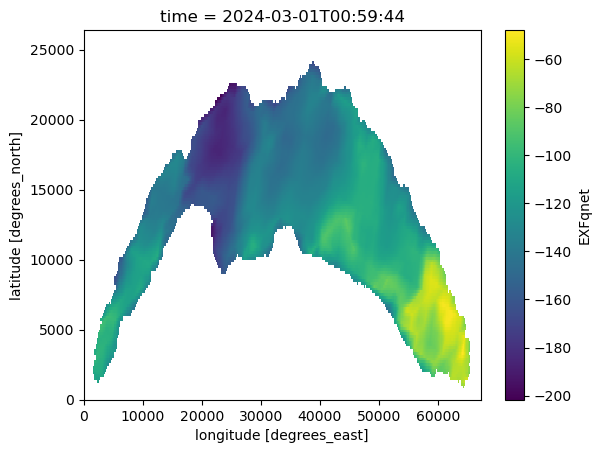

In [7]:
xr_ext_forc_masked.EXFqnet.isel(time=0).plot()

In [8]:
xr_ext_forc_mean = xr_ext_forc_masked.mean(dim=["XC", "YC"], skipna=True)

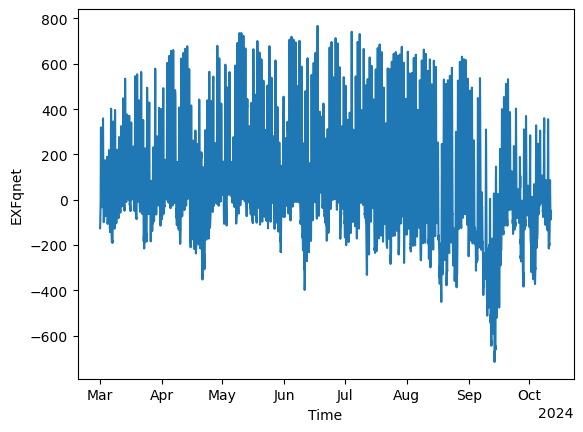

In [9]:
xr_ext_forc_mean.EXFqnet.plot()

In [10]:
# Compute the mean, considering only valid (non-NaN) values
xr_ext_forc_mean = xr_ext_forc_masked.sum(dim=["XC", "YC"]) / mask_lake.sum(dim=["XC", "YC"])

In [11]:
xr_ext_forc_mean

<xarray.Dataset> Size: 970kB
Dimensions:   (XG: 336, YG: 132, Z: 100, Zp1: 101, Zu: 100, Zl: 100, time: 5399)
Coordinates: (12/16)
  * XG        (XG) float32 1kB 0.0 200.0 400.0 ... 6.66e+04 6.68e+04 6.7e+04
  * YG        (YG) float32 528B 0.0 200.0 400.0 ... 2.58e+04 2.6e+04 2.62e+04
  * Z         (Z) float32 400B -0.25 -0.7575 -1.281 ... -295.6 -305.2 -315.1
  * Zp1       (Zp1) float32 404B 0.0 -0.5 -1.015 -1.546 ... -300.4 -310.1 -320.1
  * Zu        (Zu) float32 400B -0.5 -1.015 -1.546 ... -300.4 -310.1 -320.1
  * Zl        (Zl) float32 400B 0.0 -0.5 -1.015 -1.546 ... -290.9 -300.4 -310.1
    ...        ...
    PHrefF    (Zp1) float32 404B ...
    rhoRef    (Z) float32 400B ...
    dyU       (YG, XG) float32 177kB ...
    dxV       (YG, XG) float32 177kB ...
  * time      (time) datetime64[ns] 43kB 2024-03-01T00:59:44 ... 2024-10-11T2...
    iter      int64 8B ...
Data variables:
    EXFlwnet  (time) float64 43kB -67.62 -61.76 -48.77 ... -3.593 -3.082 -3.078
    EXFswnet  (time) float64 43kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    EXFhl     (time) float64 43kB -47.29 -44.24 -42.91 ... -36.12 -36.73 -37.24
    EXFhs     (time) float64 43kB -10.45 -10.43 -11.18 ... -8.993 -8.857 -8.49
    EXFtaux   (time) float64 43kB 0.01305 0.009454 ... 0.003396 0.004787
    EXFtauy   (time) float64 43kB 0.002997 -0.002197 ... 0.000352 0.002039
    EXFuwind  (time) float64 43kB 2.081 1.64 1.442 ... 0.7139 0.6342 0.9214
    EXFvwind  (time) float64 43kB 0.3991 -0.4518 0.2316 ... -0.1341 0.06 0.3978
    EXFqnet   (time) float64 43kB -125.4 -116.4 -102.9 ... -48.7 -48.67 -48.81

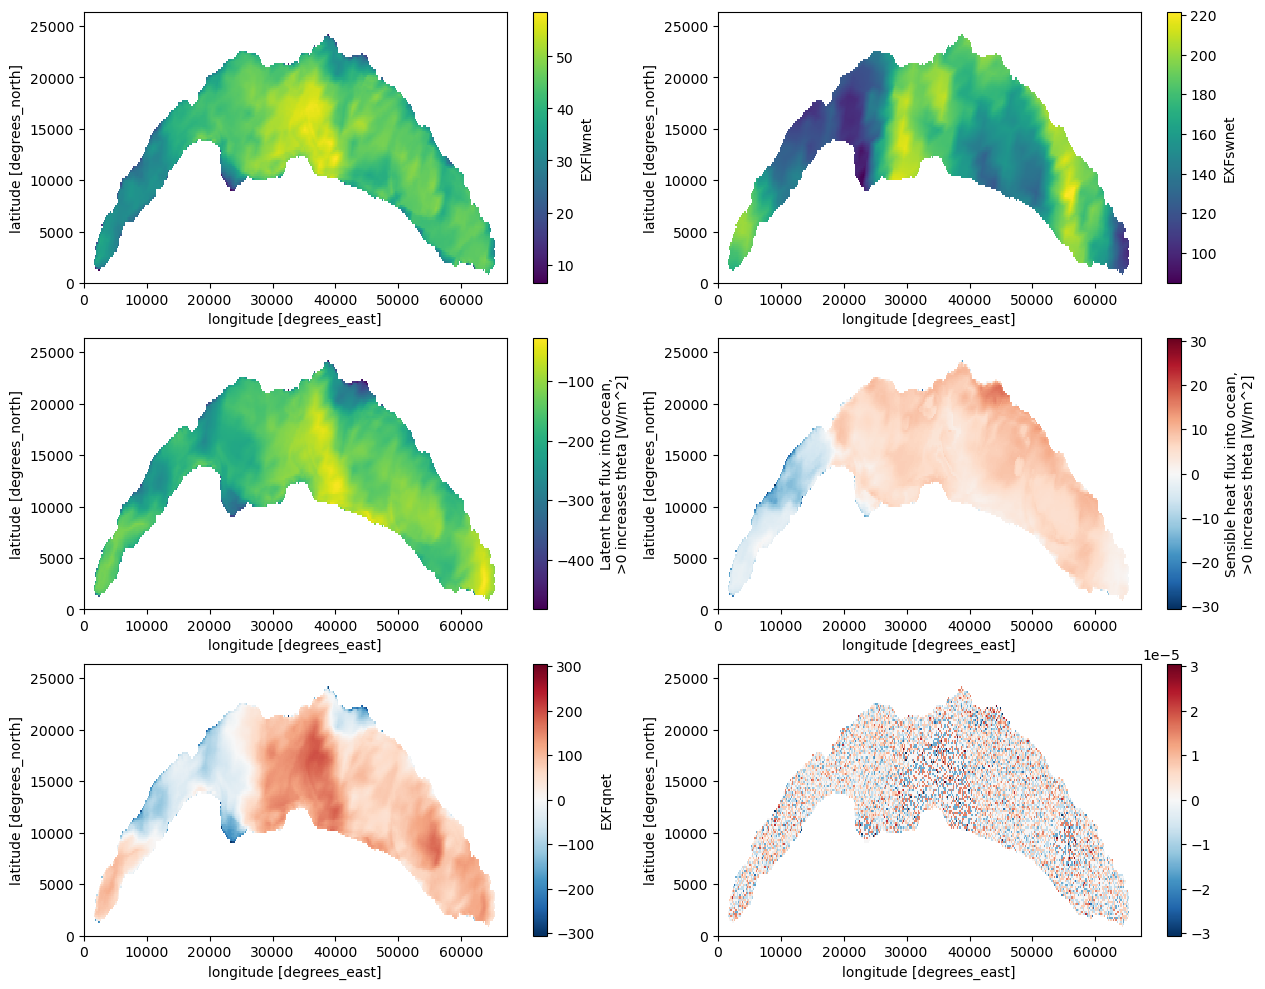

In [12]:
i_time = 4000
fig, axs = plt.subplots(3,2,figsize=(15, 12))
xr_ext_forc.EXFlwnet.isel(time=i_time).where(~np.isnan(mask_lake)).plot(ax=axs[0,0])
xr_ext_forc.EXFswnet.isel(time=i_time).where(~np.isnan(mask_lake)).plot(ax=axs[0,1])
xr_ext_forc.EXFhl.isel(time=i_time).where(~np.isnan(mask_lake)).plot(ax=axs[1,0])
xr_ext_forc.EXFhs.isel(time=i_time).where(~np.isnan(mask_lake)).plot(ax=axs[1,1])
xr_ext_forc.EXFqnet.isel(time=i_time).where(~np.isnan(mask_lake)).plot(ax=axs[2,0])

(xr_ext_forc.EXFlwnet.isel(time=i_time)
 + xr_ext_forc.EXFswnet.isel(time=i_time)
 + xr_ext_forc.EXFhl.isel(time=i_time)
 + xr_ext_forc.EXFhs.isel(time=i_time)
 - xr_ext_forc.EXFqnet.isel(time=i_time)).where(~np.isnan(mask_lake)).plot(ax=axs[2,1])

In [13]:
xr_ext_forc_resampled = xr_ext_forc_mean.resample(time='ME').mean()

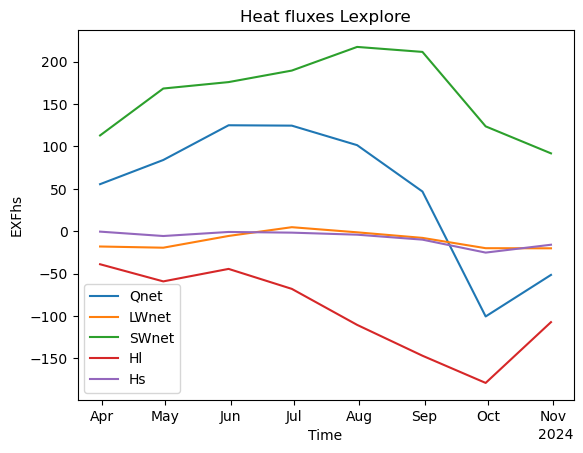

In [14]:
xr_ext_forc_resampled.EXFqnet.plot(label='Qnet')
xr_ext_forc_resampled.EXFlwnet.plot(label='LWnet')
xr_ext_forc_resampled.EXFswnet.plot(label='SWnet')
xr_ext_forc_resampled.EXFhl.plot(label='Hl')
xr_ext_forc_resampled.EXFhs.plot(label='Hs')
plt.title('Heat fluxes Lexplore')
plt.legend()

# Comparison with heat fluxes analysis

Heat fluxes done here: "C:\Users\leroquan\Documents\python\quick_analysis\heat_fluxes\geneva_heat_fluxes.ipynb"
From the simstrat input files
With : "https://renkulab.io/projects/damien.bouffard/2024-limnolab-unil-lake-heat-fluxes\n"

In [15]:
heat_fluxes = pd.read_csv('heat_fluxes_geneva_mitgcm.csv')

In [16]:
heat_fluxes['time'] = pd.to_datetime(heat_fluxes['time'])
heat_fluxes.index = heat_fluxes['time']

In [17]:
heat_fluxes_resampled = heat_fluxes.resample('ME').mean()

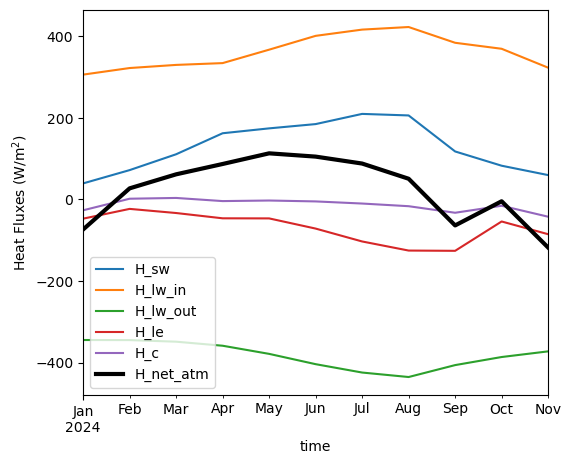

In [18]:
fig, axs = plt.subplots(1, figsize=(6, 5))
heat_fluxes_resampled['H_sw'].plot(ax=axs)
heat_fluxes_resampled['H_lw_in'].plot(ax=axs)
heat_fluxes_resampled['H_lw_out'].plot(ax=axs)
heat_fluxes_resampled['H_le'].plot(ax=axs)
heat_fluxes_resampled['H_c'].plot(ax=axs)
heat_fluxes_resampled['H_net_atm'].plot(ax=axs,lw=3, color ='k')
plt.ylabel('Heat Fluxes (W/m$^2$)')
plt.legend(loc='lower left')

In [19]:
heat_fluxes_simstrat = pd.read_csv('heat_fluxes_geneva_simstrat.csv')

In [20]:
heat_fluxes_simstrat['time'] = pd.to_datetime(heat_fluxes_simstrat['time'])
heat_fluxes_simstrat.index = heat_fluxes_simstrat['time']

In [21]:
heat_fluxes_simstrat_resampled = heat_fluxes_simstrat.resample('ME').mean()

C:\Users\leroquan\AppData\Local\anaconda3\envs\mitgcm_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


Text(0.73, 0.98, '--- Simstrat inputs\n── MITgcm inputs')

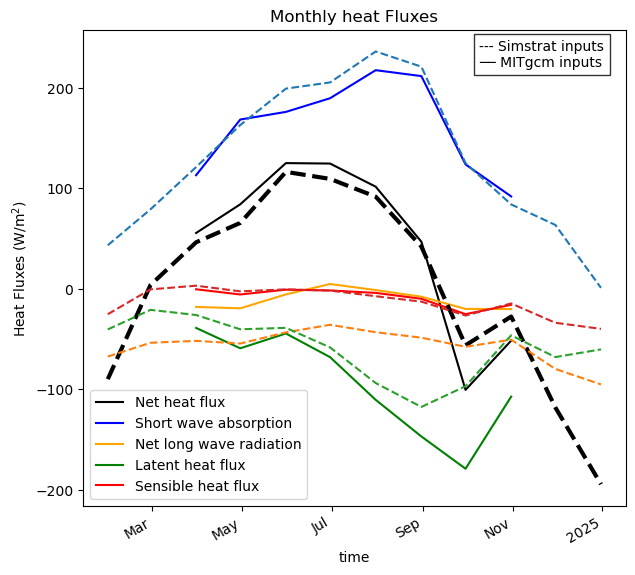

In [25]:
fig, axs = plt.subplots(1, figsize=(7, 7))

xr_ext_forc_resampled.EXFqnet.plot(ax=axs, linestyle='-', color='black', label='Net heat flux')
xr_ext_forc_resampled.EXFswnet.plot(ax=axs, linestyle='-', color = 'blue', label='Short wave absorption')
xr_ext_forc_resampled.EXFlwnet.plot(ax=axs, linestyle='-', color='orange', label='Net long wave radiation')
xr_ext_forc_resampled.EXFhl.plot(ax=axs, linestyle='-', color ='green', label='Latent heat flux')
xr_ext_forc_resampled.EXFhs.plot(ax=axs, linestyle='-', color='red', label='Sensible heat flux')

plt.plot(heat_fluxes_simstrat_resampled.index, heat_fluxes_simstrat_resampled['H_net_atm'], label='',lw=3, color ='k', linestyle='--')
heat_fluxes_simstrat_resampled['H_sw'].plot(ax=axs, label='', linestyle='--')
(heat_fluxes_simstrat_resampled['H_lw_in'] + heat_fluxes_simstrat_resampled['H_lw_out']).plot(ax=axs, label='', linestyle='--')
heat_fluxes_simstrat_resampled['H_le'].plot(ax=axs, label='', linestyle='--') # Latent heat flux
heat_fluxes_simstrat_resampled['H_c'].plot(ax=axs, label='', linestyle='--') # Sensible heat flux

plt.ylabel('Heat Fluxes (W/m$^2$)')
plt.legend(loc='lower left')
plt.title('Monthly heat Fluxes')

# Add legend-style text in the upper right
plt.text(0.73, 0.98, 
         "--- Simstrat inputs\n"
         "── MITgcm inputs", 
         transform=axs.transAxes, 
         fontsize=10, 
         verticalalignment='top', 
         horizontalalignment='left', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# Net heat fluxes from measurements

In [17]:
xr_measure = xr.open_dataset(f'../../data/datalakes/geneva_idronaut/2024.nc')

In [18]:
def interpolate_to_axis(xr_ds, axis, axis_name, max_gap=None):
    interp_ds = xr_ds.interp({axis_name: axis})

    if max_gap is not None:
        nearest_values = xr_ds[axis_name].sel({axis_name: axis}, method="nearest")
        diff = abs(nearest_values - axis)
        invalid_axis = axis[np.array(diff <= max_gap)]
        mask = interp_ds[axis_name].isin(invalid_axis)
        interp_ds = interp_ds.where(mask, np.nan)
    
    return interp_ds

In [19]:
common_time_axis = pd.date_range(
    start=pd.Timestamp('2024-02-01'), 
    end=pd.Timestamp('2024-12-01'), 
    freq='3h'
)
common_depth_axis = np.arange(0, -61, -1)

meas_selected = xr_measure['temp']
meas_interp_time = interpolate_to_axis(meas_selected, common_time_axis, 'time', np.timedelta64(15, 'D') )
meas_interp = interpolate_to_axis(meas_interp_time, common_depth_axis, 'depth')

In [20]:
temp_meas = meas_interp.values
depth = meas_interp.depth.values
bthA = np.ones(61)
bthD = depth

In [21]:
heat_content_meas = pylake.heat_content(temp_meas, bthA=bthA, bthD=bthD, depth=depth, s=0.2)

In [22]:
heat_content_meas = heat_content_meas.assign_coords(time=meas_interp['time'])

In [25]:
heat_fluxes_meas = (heat_content_meas.diff(dim='time')/3600)

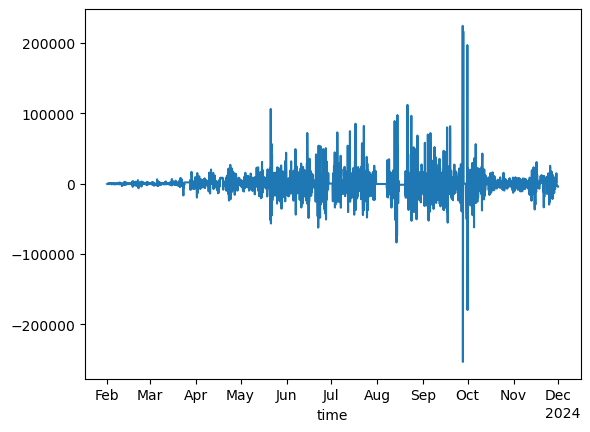

In [26]:
heat_fluxes_meas.plot()

# Heat fluxes from MITgcm temperature

In [27]:
xr_mitgcm_year = xr.open_dataset(r"D:\new_geneva_200m\cropped_results_nc\lexplore_temp_depth_time.nc")

In [28]:
crop_mitgcm = xr_mitgcm_year.isel(Z=range(0,51))
temp_mitgcm = crop_mitgcm['THETA'].values
depth_mitgcm = crop_mitgcm.Z.values
bthA_mitgcm = np.ones(len(depth_mitgcm))
bthD_mitgcm = depth_mitgcm

In [29]:
heat_content_mitgcm = pylake.heat_content(temp_mitgcm, bthA=bthA_mitgcm, bthD=bthD_mitgcm, depth=depth_mitgcm, s=0.2)

In [30]:
heat_content_mitgcm = heat_content_mitgcm.assign_coords(time=crop_mitgcm['time'])

In [31]:
heat_fluxes_mitgcm = (heat_content_mitgcm.diff(dim='time')/3600)